# Projet TP Groupe 3

## Nous avons utilisé les étapes suivantes :
## 1. Réduction de la dimension des variables avec PCA
## 2. Utilisation des Arbres de décisions pour la classification

In [1]:
# On impoete les librairies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, learning_curve

### On importe les données d'apprentissage

In [1]:
path_dataset = "dat/"

In [3]:
dataset_train = pd.read_csv(path_dataset + "train/X_train_new.txt", sep=' ', header=None)
dataset_train

,0,1,2,3,4,5,6,7,8,9,...,553,554,555,556,557,558,559,560,561,562
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,2
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,2
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,2
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,2


In [4]:
X_train = dataset_train.values[:, 0:561]
print("La dimension de X train est : {}".format(X_train.shape))

La dimension de X train est : (7352, 561)


In [5]:
y_train = dataset_train.values[:, 562]
print("La dimension de y train est : {}".format(y_train.shape))

La dimension de y train est : (7352,)


### On importe les données de test

In [6]:
dataset_test = pd.read_csv(path_dataset + "test/X_test_new.txt", sep=' ', header=None)
dataset_test

,0,1,2,3,4,5,6,7,8,9,...,553,554,555,556,557,558,559,560,561,562
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,2
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,2
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,2
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,2


In [7]:
X_test = dataset_test.values[:, 0:561]
print("La dimension de X test est : {}".format(X_test.shape))

La dimension de X test est : (2947, 561)


In [8]:
y_test = dataset_test.values[:, 562]
print("La dimension de y test est : {}".format(y_test.shape))

La dimension de y test est : (2947,)


### Utilisation de PCA pour réduire la dimension des données (Nous allons utiliser la librairie SKLearn)

In [9]:
# choix du nombre de composantes à calculer
n_comp = X_train.shape[1]
print(n_comp)

561


In [10]:
# Calcul des composantes principales
pca = PCA(n_components=n_comp)
pca.fit(X_train)

PCA(n_components=561)

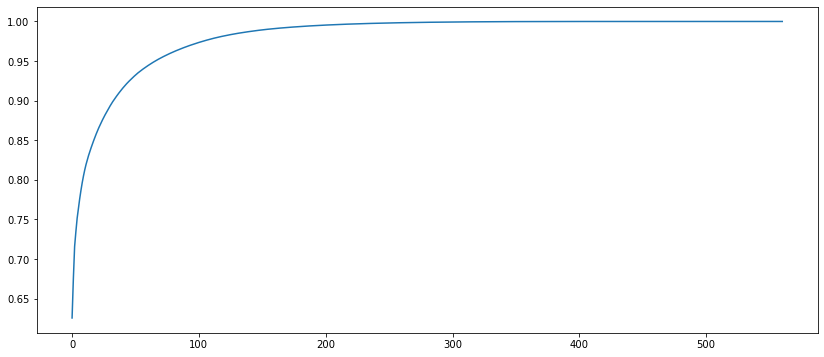

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [12]:
np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.99)

154

In [13]:
print("Nous pouvons donc réduire à 155 dimension pour conserver 99% de la variance")

Nous pouvons donc réduire à 155 dimension pour conserver 99% de la variance


In [14]:
# choix du nombre de composantes à calculer
n_comp = 155

In [15]:
# Calcul des composantes principales
pca = PCA(n_components=n_comp)
pca.fit(X_train)

PCA(n_components=155)

In [16]:
# Projection des individus
X_projected = pca.transform(X_train)

Text(0, 0.5, '2nd component')

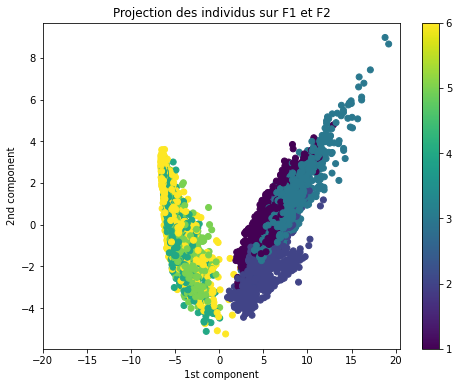

In [17]:
# Projection des composantes 1 et 2

plt.figure(figsize=(8,6))

plt.scatter(X_projected[:,0], X_projected[:,1], c=y_train)
plt.title('Projection des individus sur F1 et F2')
plt.xlim(-20)
plt.colorbar()
plt.xlabel("1st component")
plt.ylabel("2nd component")

# utilisation du modèle Arbres de décisions pour la classification

In [18]:
model_dt= make_pipeline(StandardScaler(), DecisionTreeClassifier())

params = {'decisiontreeclassifier__criterion': ['gini', 'entropy']}

grid = GridSearchCV(model_dt, params, cv=5)

print(grid)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy']})


In [19]:
# Formation du model

X_train_pca = pca.transform(X_train)

grid.fit(X_train_pca, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy']})

In [20]:
# Affichage des meilleurs paramètres du modèle
grid.best_params_

{'decisiontreeclassifier__criterion': 'entropy'}

In [21]:
# Score sur les données d'entrainement
grid.score(X_train_pca, y_train)

1.0

In [22]:
# Score sur les données de test

X_test_pca = pca.transform(X_test)

grid.score(X_test_pca, y_test)

0.8109942314217848

In [23]:
# Matrice de confusion sur les données de test
confusion = confusion_matrix(y_test, grid.predict(X_test_pca))
confusion

array([[425,  28,  43,   0,   0,   0],
       [ 62, 361,  48,   0,   0,   0],
       [ 62,  52, 306,   0,   0,   0],
       [  0,   2,   0, 360, 122,   7],
       [  0,   0,   0, 105, 427,   0],
       [  0,   0,   0,  22,   4, 511]])

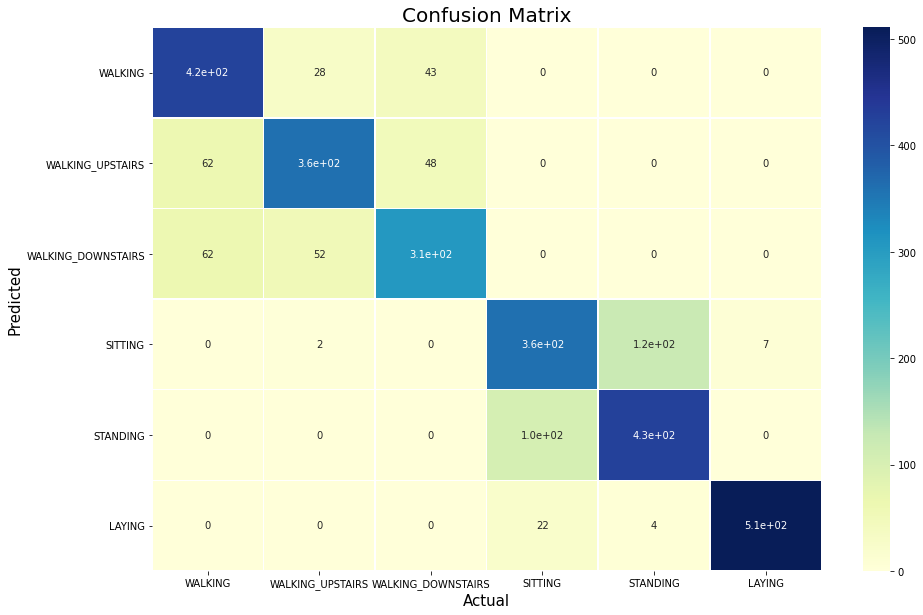

In [24]:

labels = ['WALKING', 'WALKING_UPSTAIRS', "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]

df_cm = pd.DataFrame(confusion, index = labels, columns = labels)

plt.figure(figsize = (15,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.heatmap(df_cm, annot=True, cmap="YlGnBu", linewidths=.5)
plt.xlabel('Actual', fontsize = 15) 
plt.ylabel('Predicted', fontsize = 15) 
plt.show()